In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cbf import generate_pattern_data, generate_bell, generate_cylinder, generate_funnel
import json
from itertools import product

In [35]:
patterns_mapping = {'cbf' : [generate_bell, generate_cylinder, generate_funnel],
                   'bf' : [generate_bell, generate_funnel]}
patterns = ['cbf', 'bf']
default_variances = [0.0001] + np.arange(0.2, 1.1, 0.2).tolist()
include_negatives = [False, True]

length = 10000
pattern_length = 100
amplitude = 10

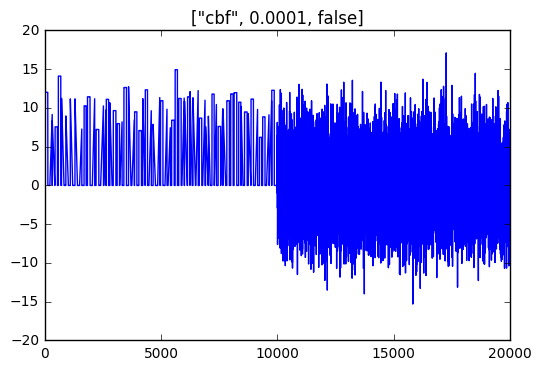

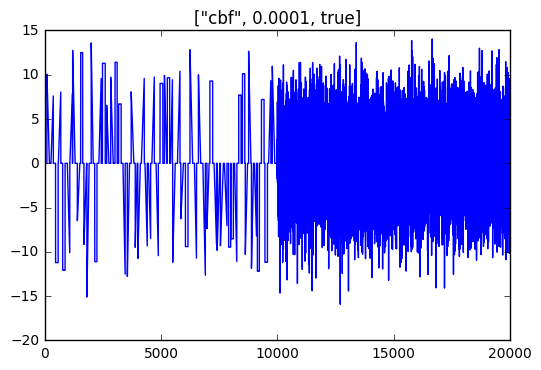

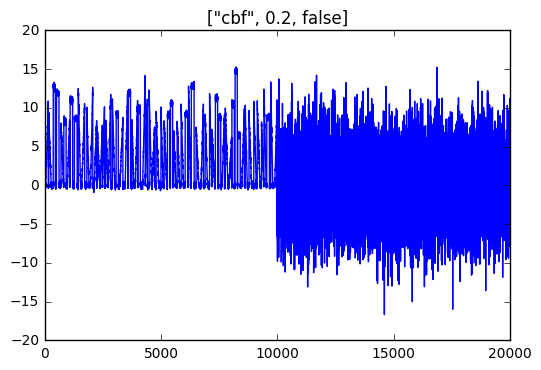

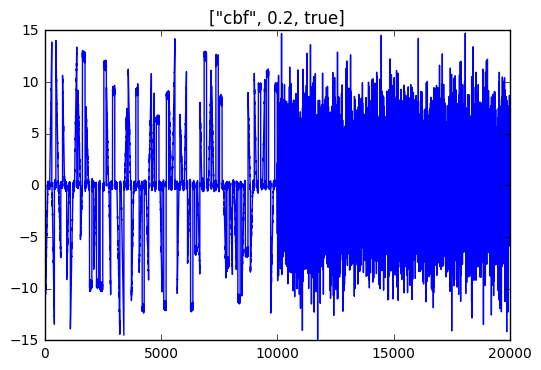

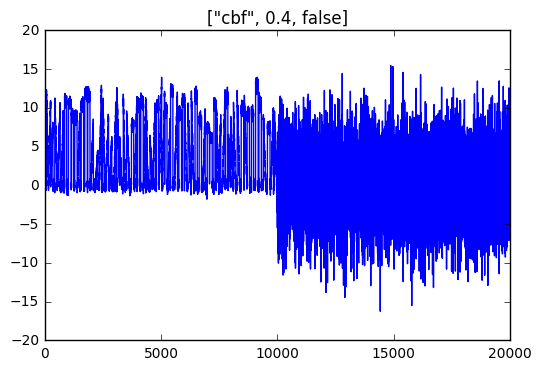

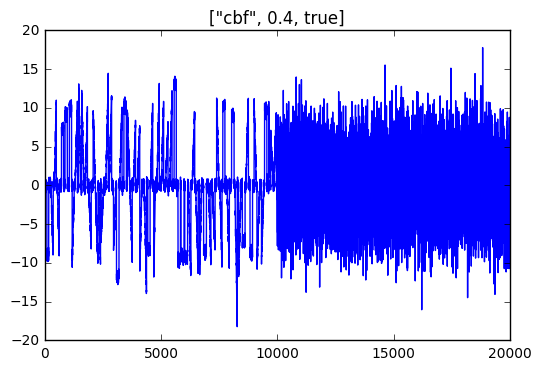

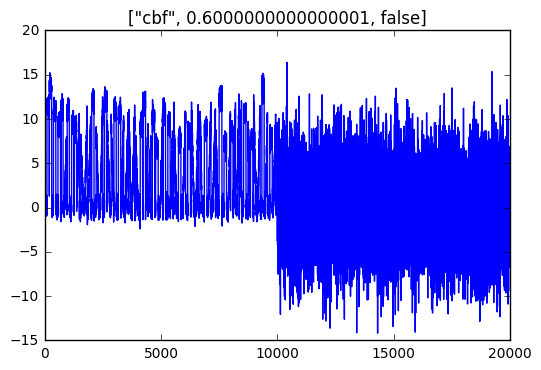

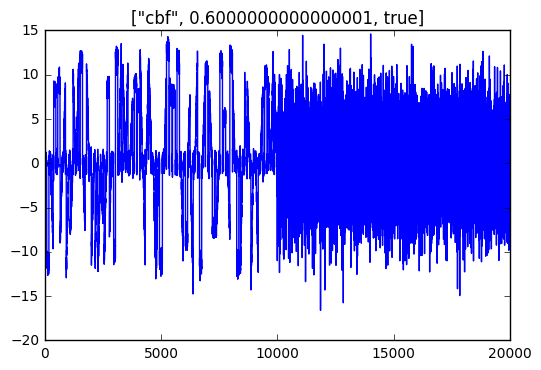

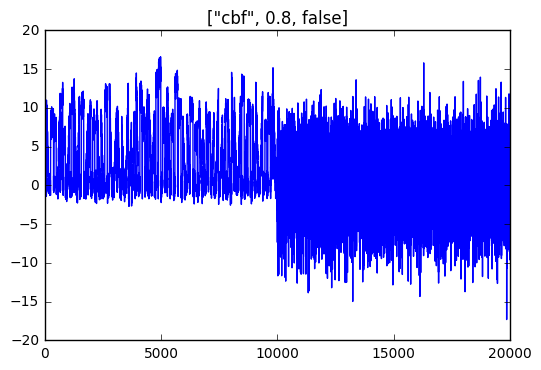

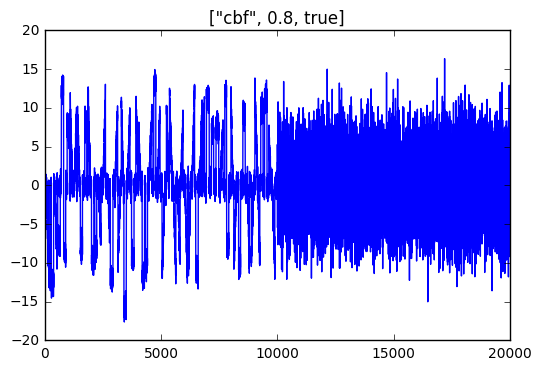

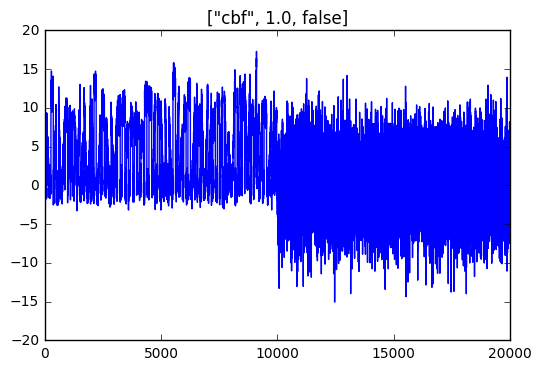

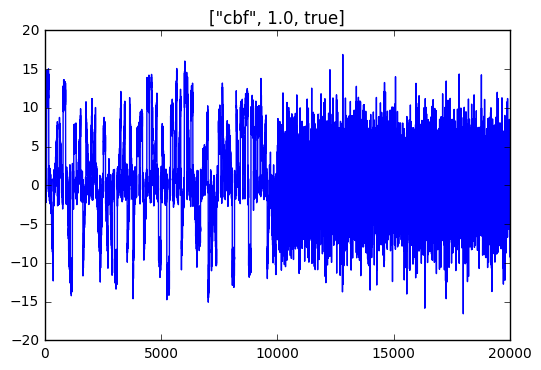

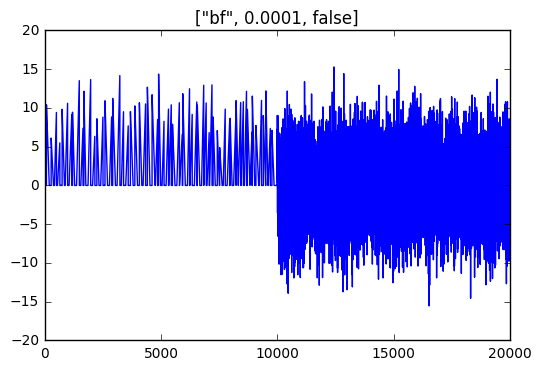

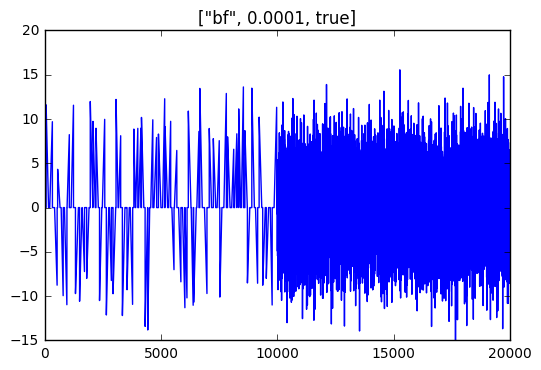

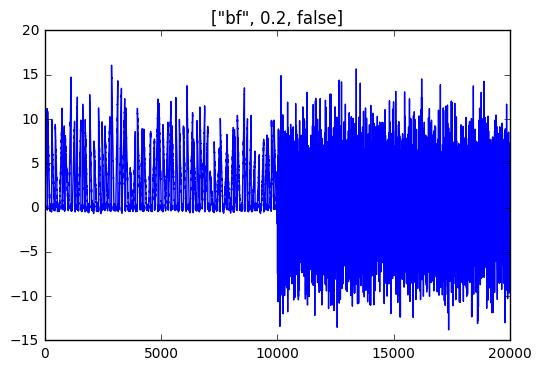

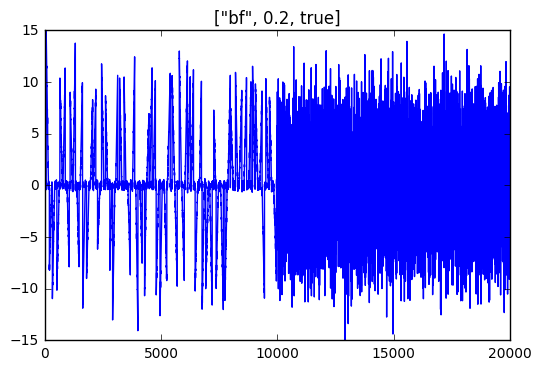

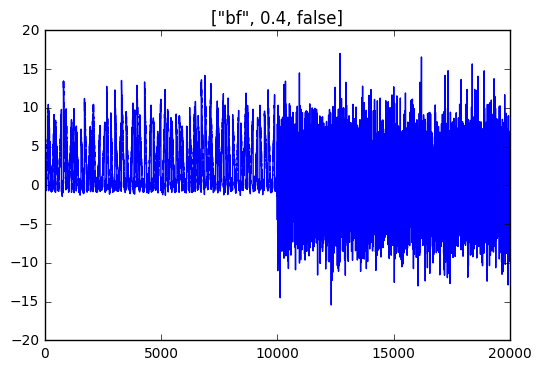

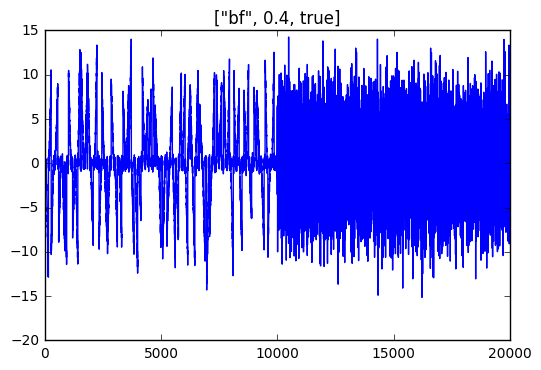

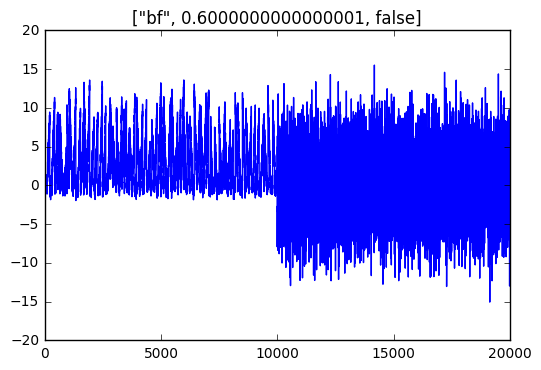

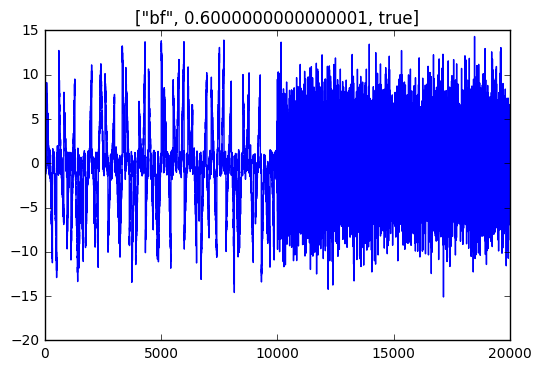

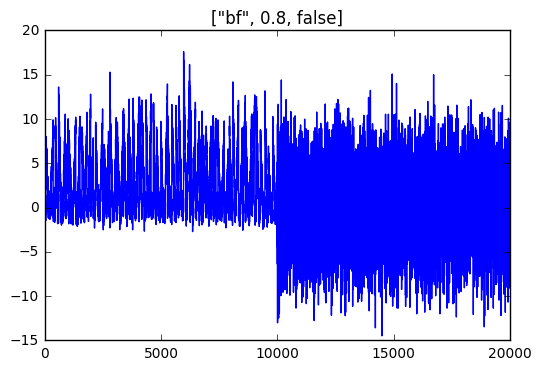

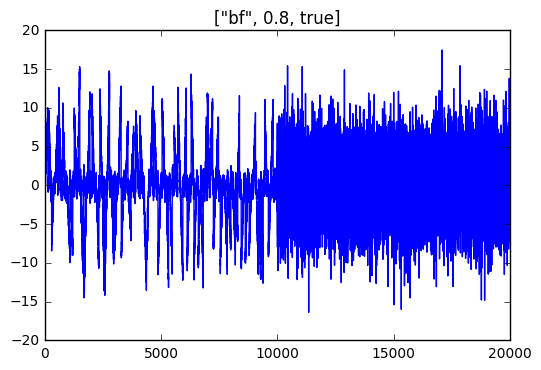

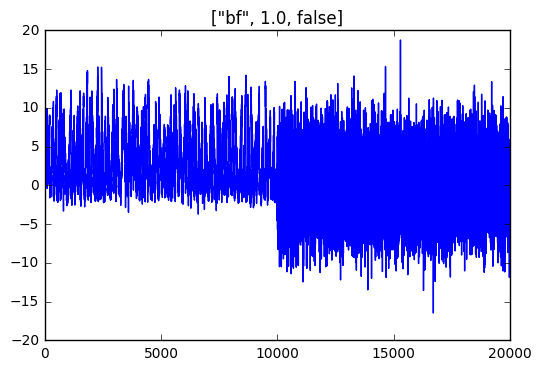

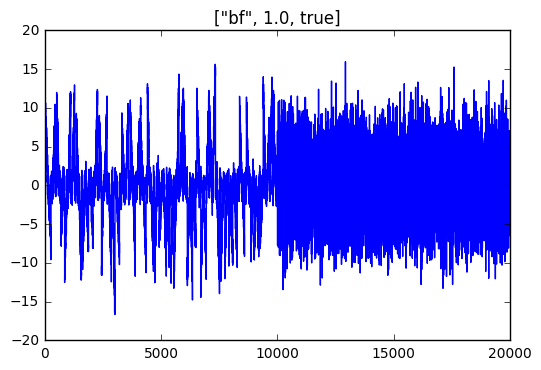

In [39]:
data_dict = {}

for pattern, variance, negative in product(patterns, default_variances, include_negatives):
    config = json.dumps([pattern, variance, negative])
    
    pattern_data = generate_pattern_data(length, pattern_length, amplitude, default_variance = variance,
                                         generators = patterns_mapping[pattern], include_negatives = negative)
    random_data = np.random.normal(0, 4, length)
    complete_data = np.append(pattern_data, random_data)
    
    data_dict[config] = complete_data
    
    plt.plot(np.arange(length*2), complete_data)
    plt.title(config)
    plt.show()
    
pd.DataFrame(data_dict).to_csv('../data/pattern_and_random_generation.csv', index = False)